### Objective is to understand the dependency of car price on various features provided in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.shape

(205, 26)

In [176]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [177]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data pre-processing

In [179]:
# separating car company name from car name
df['Company'] = df['CarName'].apply(lambda x: x.split()[0])
df['Company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Company, Length: 205, dtype: object

In [180]:
df.drop('CarName', axis=1, inplace=True)
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [181]:
# repeated company names such as maxda-mazda, Nissan-nissan, etc. needs to be treated

def company_name(a,b):
    df['Company'].replace(a, b, inplace=True)

company_name('maxda', 'mazda')
company_name('porcshce','porsche')
company_name('Nissan', 'nissan')
company_name('toyouta','toyota')
company_name('vokswagen','volkswagen')
company_name('vw','volkswagen')

In [182]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [183]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

## Visualisation - numeric features

In [184]:
# checking which columns have numeric datatype

numeric_columns = [x for x in df.columns if df[x].dtype!=object]
X_num = df[numeric_columns]

In [185]:
X_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [186]:
# car_ID isn't of any use in the analysis
X_num.drop('car_ID', axis=1, inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_14056\3169122051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num.drop('car_ID', axis=1, inplace=True)


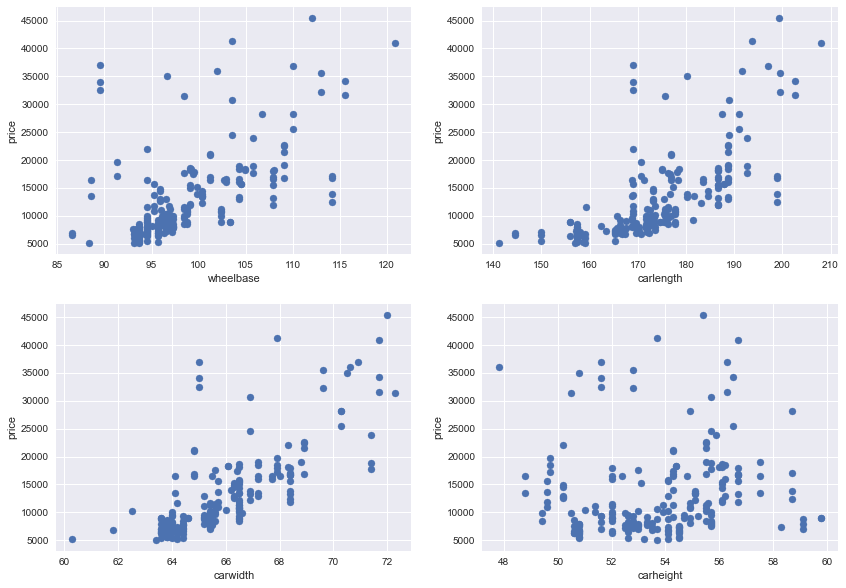

In [187]:
# relation of car dimensions with car price

plt.style.use('seaborn')

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

ax1.scatter(X_num['wheelbase'], X_num['price'])
ax1.set(xlabel='wheelbase', ylabel='price')

ax2.scatter(X_num['carlength'], X_num['price'])
ax2.set(xlabel='carlength', ylabel='price')

ax3.scatter(X_num['carwidth'], X_num['price'])
ax3.set(xlabel='carwidth', ylabel='price')

ax4.scatter(X_num['carheight'], X_num['price'])
ax4.set(xlabel='carheight', ylabel='price');

carheight doesn't have a significant correlation with price

In [188]:
df.drop('carheight', axis=1, inplace=True)

<AxesSubplot:>

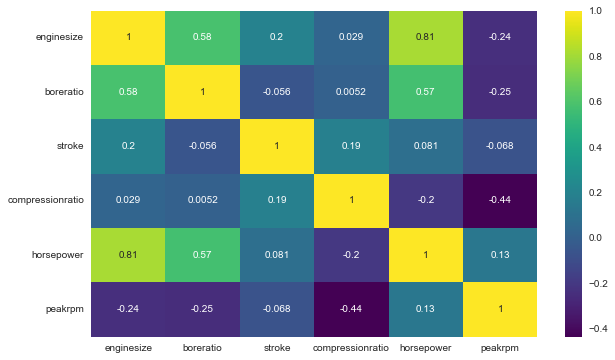

In [189]:
# correlation among engine related features:- enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm

corr_matrix = df[['enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm']].corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)

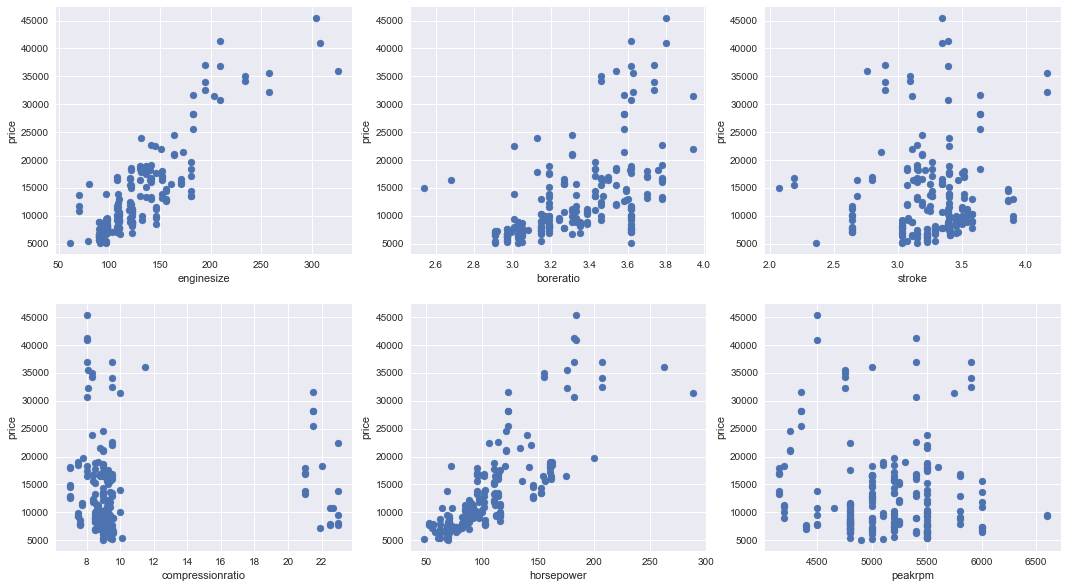

In [190]:
# correlation b/w Price and engine parameters

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

ax1.scatter(X_num['enginesize'], X_num['price'])
ax1.set(xlabel='enginesize', ylabel='price')

ax2.scatter(X_num['boreratio'], X_num['price'])
ax2.set(xlabel='boreratio', ylabel='price')

ax3.scatter(X_num['stroke'], X_num['price'])
ax3.set(xlabel='stroke', ylabel='price')

ax4.scatter(X_num['compressionratio'], X_num['price'])
ax4.set(xlabel='compressionratio', ylabel='price')

ax5.scatter(X_num['horsepower'], X_num['price'])
ax5.set(xlabel='horsepower', ylabel='price')

ax6.scatter(X_num['peakrpm'], X_num['price'])
ax6.set(xlabel='peakrpm', ylabel='price');

 among the above 6 features, only enginesize, boreratio and horsepower seem to have some correlation with price. 

In [191]:
df.drop(['stroke','compressionratio','peakrpm'], axis=1, inplace=True)

In [192]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


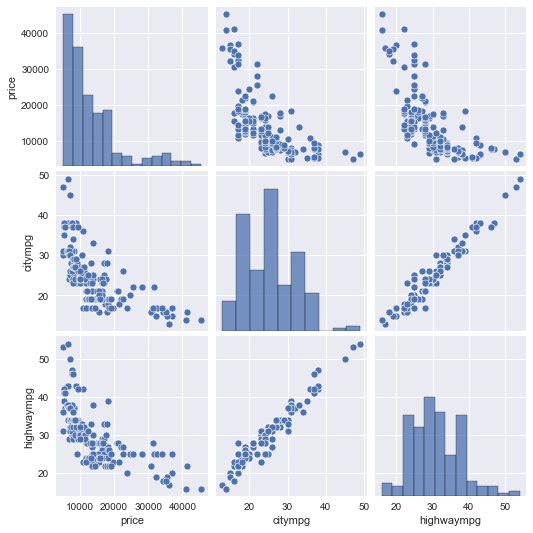

In [193]:
sns.pairplot(df[['price','citympg','highwaympg']])

from the above pairplot, citympg and highwaympg columns are highly correlated. Thus making a new column as mean of citympg 
and highwaympg and dropping the individual columns

In [194]:
# df['mpg'] = np.mean([df['citympg'][index], df['highwaympg'][index]])
df['mpg'] = 0
for index in df.index:
    df['mpg'][index] = np.mean([df['citympg'][index], df['highwaympg'][index]])

C:\Users\harsh\AppData\Local\Temp\ipykernel_14056\3138397232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg'][index] = np.mean([df['citympg'][index], df['highwaympg'][index]])


In [195]:
df.drop(['citympg','highwaympg'], axis=1, inplace=True)

In [196]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,Company,mpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,13495.0,alfa-romero,24.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,16500.0,alfa-romero,24.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,2.68,154,16500.0,alfa-romero,22.5
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,3.19,102,13950.0,audi,27.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,3.19,115,17450.0,audi,20.0


## Visualising categorical features

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   symboling       205 non-null    int64  
 2   fueltype        205 non-null    object 
 3   aspiration      205 non-null    object 
 4   doornumber      205 non-null    object 
 5   carbody         205 non-null    object 
 6   drivewheel      205 non-null    object 
 7   enginelocation  205 non-null    object 
 8   wheelbase       205 non-null    float64
 9   carlength       205 non-null    float64
 10  carwidth        205 non-null    float64
 11  curbweight      205 non-null    int64  
 12  enginetype      205 non-null    object 
 13  cylindernumber  205 non-null    object 
 14  enginesize      205 non-null    int64  
 15  fuelsystem      205 non-null    object 
 16  boreratio       205 non-null    float64
 17  horsepower      205 non-null    int

In [198]:
categorical_columns = [x for x in df.columns if df[x].dtype==object]
X_cat = df[categorical_columns]
X_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


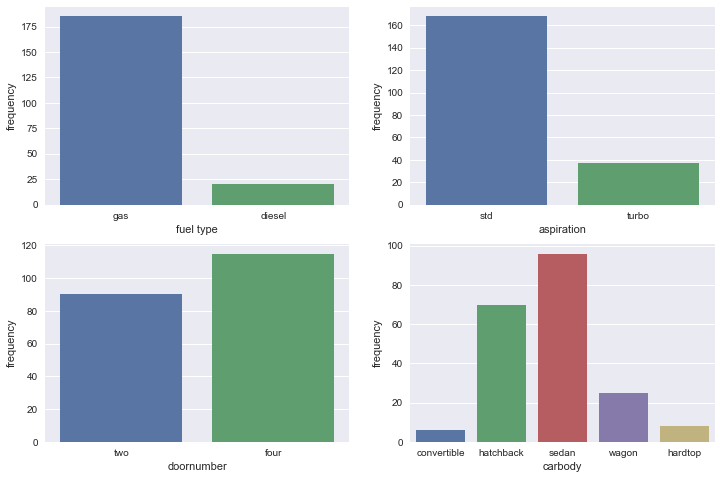

In [199]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.countplot(x = X_cat['fueltype'], ax=ax1)
ax1.set(xlabel='fuel type', ylabel='frequency')

sns.countplot(x = X_cat['aspiration'], ax=ax2)
ax2.set(xlabel='aspiration', ylabel='frequency')

sns.countplot(x = X_cat['doornumber'], ax=ax3)
ax3.set(xlabel='doornumber', ylabel='frequency')

sns.countplot(x = X_cat['carbody'], ax=ax4)
ax4.set(xlabel='carbody', ylabel='frequency');

<AxesSubplot:xlabel='doornumber', ylabel='price'>

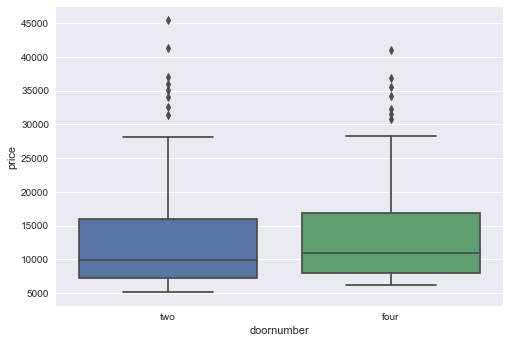

In [200]:
sns.boxplot(x=X_cat['doornumber'], y=df['price'])

* doornumber turns out to be an insignificant feature as both types are almost similar in number and do not show any 
specific trend with price
* aspiration, fueltype, carbody are significant features

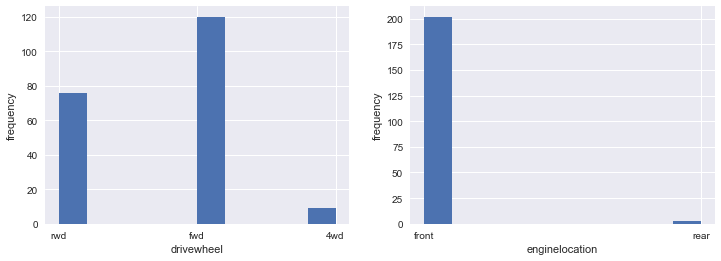

In [201]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.hist(X_cat['drivewheel'])
ax1.set(xlabel='drivewheel', ylabel='frequency')

ax2.hist(X_cat['enginelocation'])
ax2.set(xlabel='enginelocation', ylabel='frequency');

engine location is insignificant feature

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

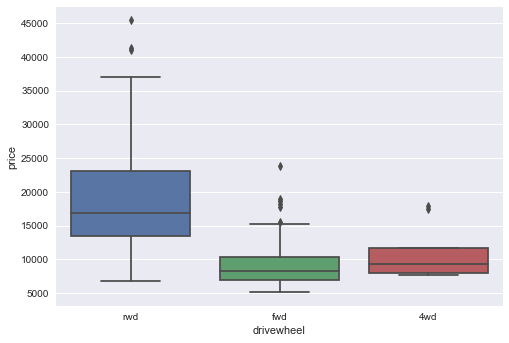

In [202]:
sns.boxplot(x=X_cat['drivewheel'], y=df['price'])

drivewheel clearly has a relation with price; rwd cars tend to be more costly

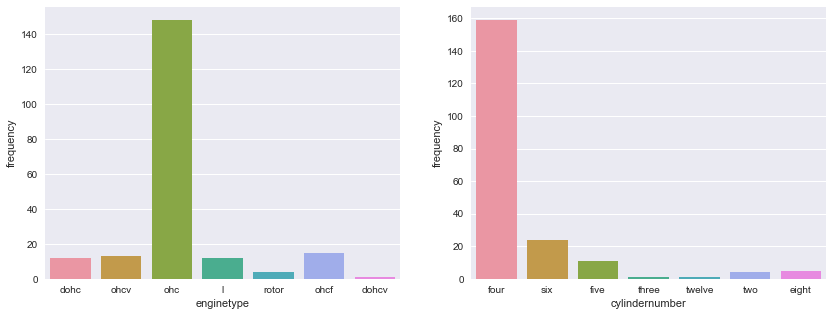

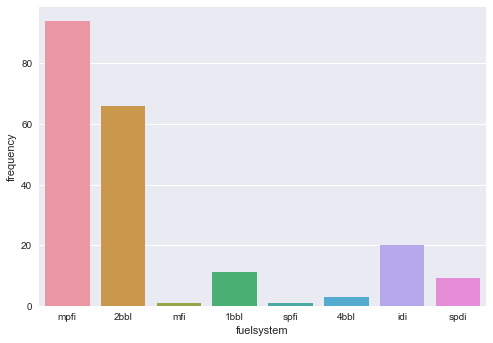

In [203]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.countplot(x = X_cat['enginetype'], ax=ax1)
ax1.set(xlabel='enginetype', ylabel='frequency')

sns.countplot(x = X_cat['cylindernumber'], ax=ax2)
ax2.set(xlabel='cylindernumber', ylabel='frequency')

fig2, ax = plt.subplots()
sns.countplot(x = X_cat['fuelsystem'], ax=ax)
ax.set(xlabel='fuelsystem', ylabel='frequency');


* most common enginetype is ohc
* four and six cylindernumbers are in majority in the given dataset
* mpfi and 2bbl are the most commonly used fuelsystems

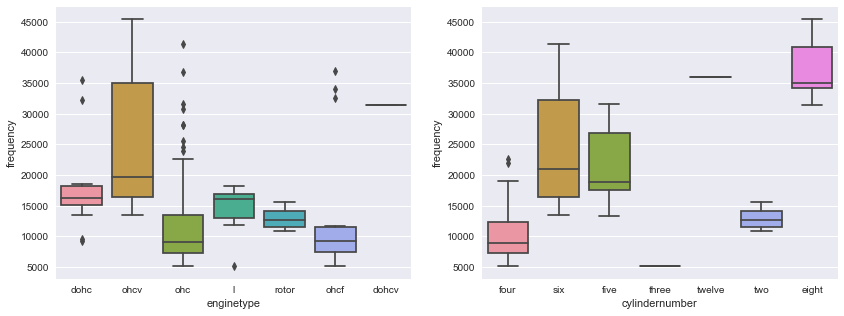

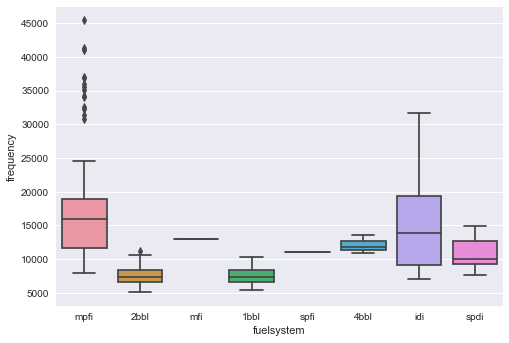

In [204]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.boxplot(x=X_cat['enginetype'], y=df['price'], ax=ax1)
ax1.set(xlabel='enginetype', ylabel='frequency')

sns.boxplot(x=X_cat['cylindernumber'], y=df['price'], ax=ax2)
ax2.set(xlabel='cylindernumber', ylabel='frequency')

fig2, ax = plt.subplots()
sns.boxplot(x=X_cat['fuelsystem'], y=df['price'], ax=ax)
ax.set(xlabel='fuelsystem', ylabel='frequency');

* enginetype: ohcv is the most expensive, ohc which was most frequent in the dataset has low price range
* cylindernumber: six, five, eight have higher price ranges while four is most frequent. But lack of data points of other
    categories might lead to biased conclusions by the algorithm. Thus, this feature is not of much significance.
* fuelsystem: significant

#### insignificant categorical variables: cylindernumber, enginelocation, doornumber

In [205]:
df.drop(['cylindernumber', 'enginelocation', 'doornumber'], axis=1, inplace=True)

In [206]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'price', 'Company', 'mpg'],
      dtype='object')

#### get dummy variables

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_ID      205 non-null    int64  
 1   symboling   205 non-null    int64  
 2   fueltype    205 non-null    object 
 3   aspiration  205 non-null    object 
 4   carbody     205 non-null    object 
 5   drivewheel  205 non-null    object 
 6   wheelbase   205 non-null    float64
 7   carlength   205 non-null    float64
 8   carwidth    205 non-null    float64
 9   curbweight  205 non-null    int64  
 10  enginetype  205 non-null    object 
 11  enginesize  205 non-null    int64  
 12  fuelsystem  205 non-null    object 
 13  boreratio   205 non-null    float64
 14  horsepower  205 non-null    int64  
 15  price       205 non-null    float64
 16  Company     205 non-null    object 
 17  mpg         205 non-null    float64
dtypes: float64(6), int64(5), object(7)
memory usage: 29.0+ KB


In [208]:
df1 = pd.get_dummies(data=df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'Company']],
                     drop_first=True)

In [209]:
df1.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
df.drop(['car_ID', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'Company'], axis=1,
       inplace=True)

In [211]:
df = pd.concat([df, df1], axis=1)
df.head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mpg,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,88.6,168.8,64.1,2548,130,3.47,111,13495.0,24.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,2548,130,3.47,111,16500.0,24.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.5,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,2337,109,3.19,102,13950.0,27.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,2824,136,3.19,115,17450.0,20.0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
df.shape

(205, 52)

In [213]:
# splitting data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=1)

In [214]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [215]:
# scaling data
from sklearn.preprocessing import StandardScaler

# scaling only those numercial variables that are not obtained from dummy variables
variables = ['symboling','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','mpg']

scaler_x = StandardScaler()
scaler_x.fit(X_train[variables])

X_train[variables] = scaler_x.transform(X_train[variables])
X_test[variables] = scaler_x.transform(X_test[variables])

scaler_y = StandardScaler()
scaler_y.fit(y_train)

y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

## Linear regression model

In [216]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [217]:
print(f"training accuracy: {model.score(X_train, y_train)}")
print(f"test accuracy: {model.score(X_test, y_test)}")

training accuracy: 0.9668215601253002
test accuracy: 0.8583797853814489


In [218]:
# simple linear regression model results in high variance. Thus applying regularisation
# Ridge regression applies l2 regularisation

from sklearn.linear_model import Ridge

In [244]:
# varying alpha to see how accuracy gets affected with regularisation parameter alpha, incrementing alpha by 3 times in each 
# iteration

i = 0.001
training_accuracy = []
test_accuracy = []

for j in range(0,14):
    model_ridge = Ridge(alpha = i)
    model_ridge.fit(X_train, y_train)
    
    training_accuracy.append(100 * model_ridge.score(X_train, y_train))
    test_accuracy.append(100 * model_ridge.score(X_test, y_test))

    i = i * 3

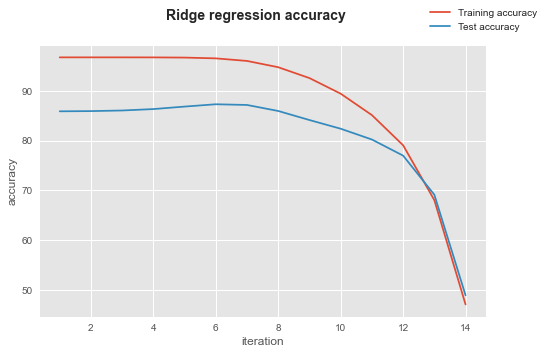

In [246]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(1,15), training_accuracy, label='Training accuracy')
ax.plot(np.arange(1,15), test_accuracy, label='Test accuracy')
ax.set(xlabel='iteration', ylabel='accuracy')

fig.suptitle('Ridge regression accuracy', fontsize=14, fontweight='bold')
fig.legend();

accuracy is highest for 6th iteration i.e. alpha = 0.001 * (3**5)

In [248]:
print("Ridge regression accuracy: ")
print(f"training data - {training_accuracy[5]}")
print(f"test data - {test_accuracy[5]}")

Ridge regression accuracy: 
training data - 96.47839490132883
test data - 87.27609332493313


Ridge model is better than simple linear regression due to slight less variance